In [2]:
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium 
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 40 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 2s (937 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 160837 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%

In [3]:
import pandas as pd 
import numpy as np
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from pandas.io.json import json_normalize
import math

In [5]:
rest_data = pd.read_csv('Test.csv', index_col=None)
rest_data.shape

(17689, 12)

In [6]:
# Drop 'rating=NaN' from the csv file
rest_data.dropna(subset = ["rating"], inplace=True)

In [7]:
rest_data["main categories"].replace({"Café":"Coffee Shop"}, inplace=True)

In [8]:
# Drop 'main categories = Food trucks' from the csv file
rest_data=rest_data.drop(rest_data[rest_data["main categories"]=="Food Truck"].index)

In [9]:
rest_data.shape

(7810, 12)

In [10]:
rest_data.head()

,name,categories,main categories,address,lat,lng,price,likes,photos,tips,rating,ratingSignals
4,Dunkin',Donut Shop,Donut Shop,"الرياض, المملكة العربية السعودية",24.525001,46.433944,Cheap,29.0,90,1,8.9,32.0
5,Moroccan Taste (المذاق المغربي),Café,Coffee Shop,"Makkah Al Mukarramah Rd, الرياض, المملكة العرب...",24.524937,46.433539,Cheap,22.0,13,2,8.6,24.0
6,كرك جدي,Café,Coffee Shop,"الرياض, المملكة العربية السعودية",24.525068,46.434203,Cheap,24.0,27,1,7.3,33.0
7,دانكن دونت طريق المزاحميه,"Donut Shop, Coffee Shop",Donut Shop,"الرياض, المملكة العربية السعودية",24.524959,46.433641,Cheap,0.0,6,0,8.3,0.0
13,Starbucks,Coffee Shop,Coffee Shop,"الرياض 14723, المملكة العربية السعودية",24.522543,46.648867,Cheap,1.0,16,0,8.1,1.0


In [11]:
rest_data.describe()

,lat,lng,likes,photos,tips,rating,ratingSignals
count,7810.000000,7810.000000,7810.000000,7810.000000,7810.00000,7810.000000,7810.000000
mean,24.730069,46.694915,154.276184,406.625224,41.36735,7.530026,203.638924
std,0.075507,0.066877,441.750254,1517.284455,114.36865,0.943625,555.825130
min,24.522543,46.433539,0.000000,0.000000,0.00000,4.400000,0.000000
25%,24.688250,46.647985,10.000000,10.000000,2.00000,6.900000,14.000000
50%,24.742246,46.689193,27.000000,34.000000,7.00000,7.600000,39.000000
75%,24.784622,46.745267,108.000000,153.000000,27.00000,8.200000,146.000000
max,24.943310,46.940053,9984.000000,26332.000000,2301.00000,9.600000,12376.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



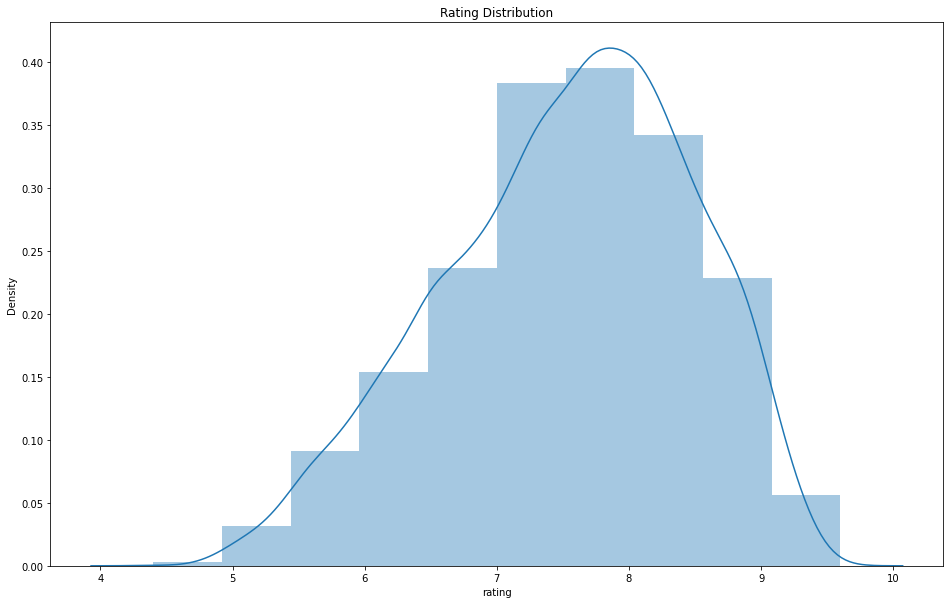

In [15]:
fig, ax = plt.subplots(figsize=(16,10))
sns.distplot(rest_data['rating'], bins=10, kde=True )
plt.title('Rating Distribution')
plt.savefig('ratingD.png')

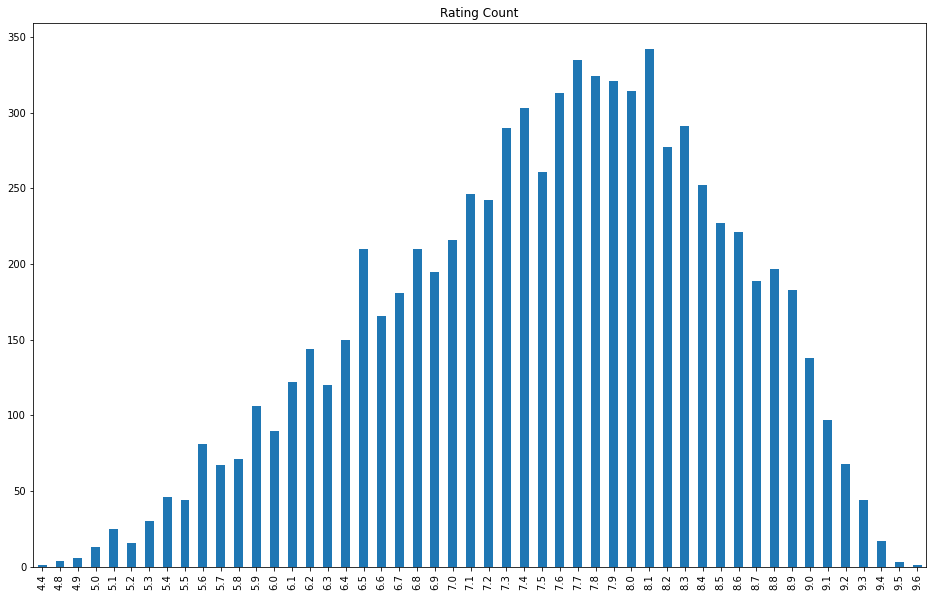

In [13]:
fig, ax = plt.subplots(figsize=(16,10))
rest_data['rating'].value_counts().sort_index().plot.bar()
plt.title('Rating Count')
plt.savefig('ratingC.png')

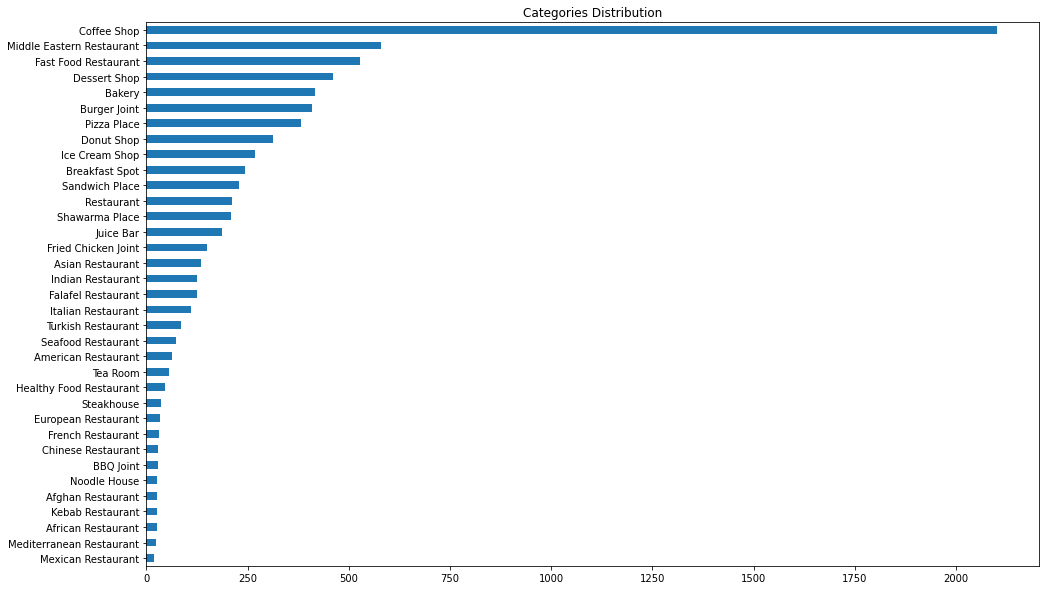

In [16]:
fig, ax = plt.subplots(figsize=(16,10))
rest_data['main categories'].value_counts(ascending=True).plot.barh()
plt.title('Categories Distribution')
plt.savefig('categoriesD.png')

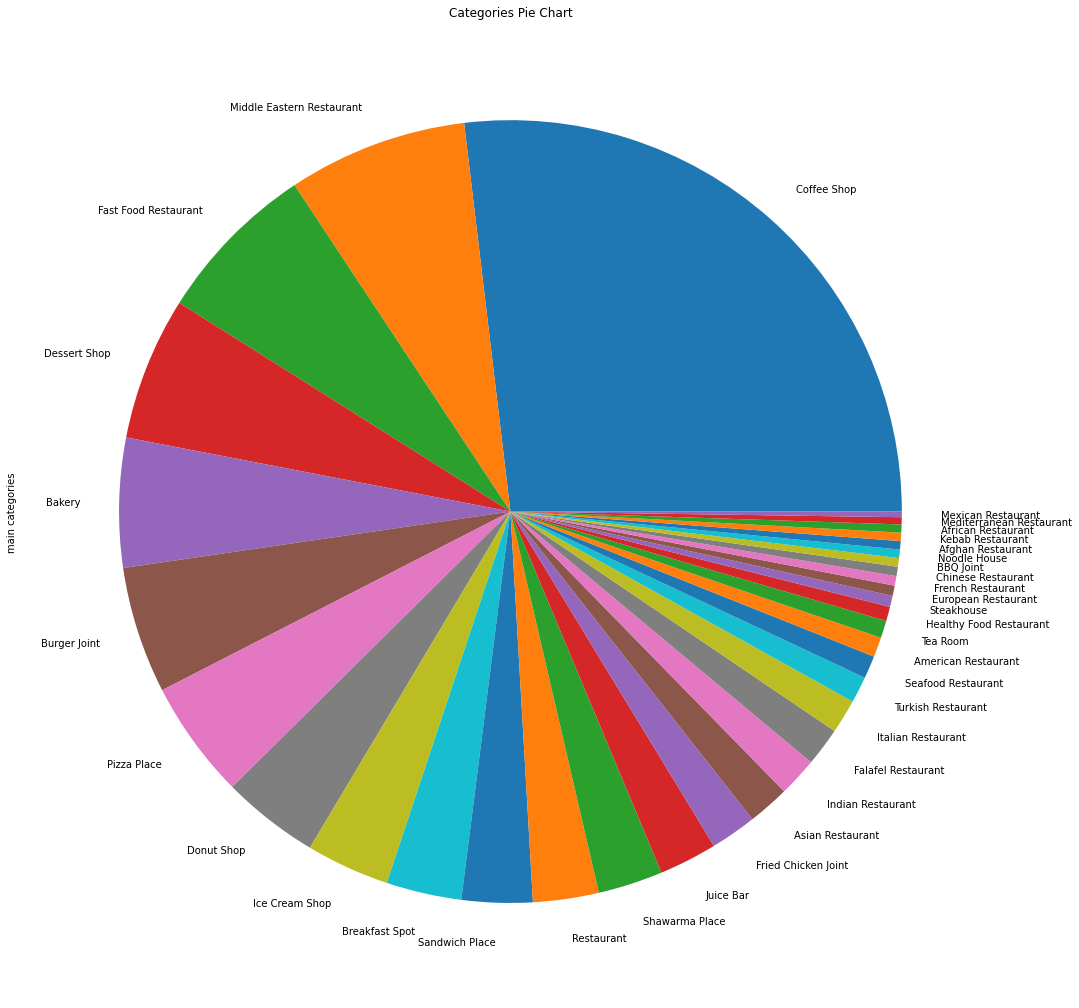

In [17]:
fig, ax = plt.subplots(figsize=(18,18))
rest_data['main categories'].value_counts().plot(kind='pie')
plt.title('Categories Pie Chart')
plt.savefig('categoriesP.png')

In [19]:
X=rest_data.loc[:,['name','main categories','lat','lng','rating']]
X.head(10)

,name,main categories,lat,lng,rating
4,Dunkin',Donut Shop,24.525001,46.433944,8.9
5,Moroccan Taste (المذاق المغربي),Coffee Shop,24.524937,46.433539,8.6
6,كرك جدي,Coffee Shop,24.525068,46.434203,7.3
7,دانكن دونت طريق المزاحميه,Donut Shop,24.524959,46.433641,8.3
13,Starbucks,Coffee Shop,24.522543,46.648867,8.1
15,بهارات الأولين,Middle Eastern Restaurant,24.525009,46.687660,7.8
28,Burger King,Fast Food Restaurant,24.527135,46.669922,6.7
35,KFC (كنتاكي),Fast Food Restaurant,24.535848,46.656771,6.3
38,Starbucks,Coffee Shop,24.535589,46.688637,8.0
40,Dunkin Donuts (دانكن دونتس),Donut Shop,24.535352,46.693243,8.2


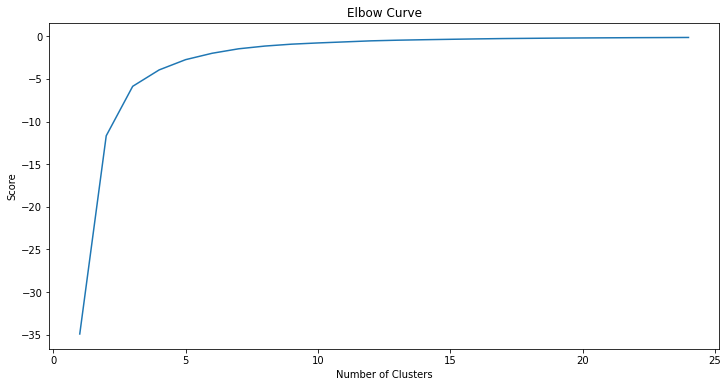

In [20]:
K_clusters = range(1,25)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = rest_data[['lng']]
X_axis = rest_data[['lat']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
fig = plt.figure(figsize=(12,6))
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.savefig('Elbow Curve.png')
plt.show()

In [21]:
kmeans = KMeans(n_clusters = 10, init ='k-means++')
kmeans.fit(X[X.columns[2:4]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[2:4]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[2:4]]) # Labels of each point
X.head(10)

,name,main categories,lat,lng,rating,cluster_label
4,Dunkin',Donut Shop,24.525001,46.433944,8.9,9
5,Moroccan Taste (المذاق المغربي),Coffee Shop,24.524937,46.433539,8.6,9
6,كرك جدي,Coffee Shop,24.525068,46.434203,7.3,9
7,دانكن دونت طريق المزاحميه,Donut Shop,24.524959,46.433641,8.3,9
13,Starbucks,Coffee Shop,24.522543,46.648867,8.1,2
15,بهارات الأولين,Middle Eastern Restaurant,24.525009,46.687660,7.8,2
28,Burger King,Fast Food Restaurant,24.527135,46.669922,6.7,2
35,KFC (كنتاكي),Fast Food Restaurant,24.535848,46.656771,6.3,2
38,Starbucks,Coffee Shop,24.535589,46.688637,8.0,2
40,Dunkin Donuts (دانكن دونتس),Donut Shop,24.535352,46.693243,8.2,2


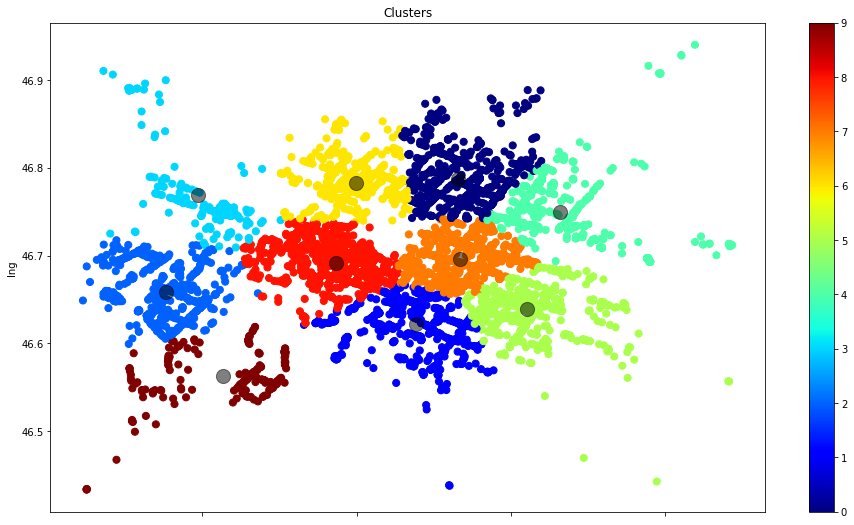

In [22]:
plt.rcParams["figure.figsize"] = [16,9]
X.plot.scatter(x = 'lat', y = 'lng', c=labels, s=50, cmap='jet')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clusters')
plt.savefig('clusters.png')
plt.show()

In [23]:
def show_restaurants(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster_label']==cluster].iloc[0:20][['name', 'lat','lng','main categories','rating','cluster_label'	]]

In [25]:
lat_user = 24.726486317804063 #@param {type:"number"}
lng_user = 46.712396012784374 #@param {type:"number"}
user_category = "Coffee Shop" #@param ["Donut Shop", "Coffee Shop", "Middle Eastern Restaurant", "Fast Food Restaurant", "Turkish Restaurant"]


In [26]:
top_restaurants = X.loc[ (X["rating"] > 6) & (X["main categories"] == user_category)].sort_values(by=['rating','cluster_label','lat','lng'], ascending=False)
top_restaurants.head(10)

,name,main categories,lat,lng,rating,cluster_label
7653,Camel Step Roasters (محمصة خطوة جمل),Coffee Shop,24.710538,46.667530,9.5,8
6784,Starbucks (ستاربكس),Coffee Shop,24.702457,46.650758,9.4,8
4713,Elixir Bunn Coffee Roasters (اكسير البن),Coffee Shop,24.675592,46.668199,9.4,8
13254,Starbucks (ستاربكس),Coffee Shop,24.778698,46.733454,9.4,7
10756,9th Street Coffee Roaster (محمصة ناينث ستريت),Coffee Shop,24.751276,46.670862,9.4,7
10363,Steam Cafe,Coffee Shop,24.749620,46.722755,9.4,7
10373,Qomra (قمرة),Coffee Shop,24.745617,46.723647,9.4,7
17191,Starbucks (ستاربكس),Coffee Shop,24.851020,46.673805,9.4,5
1028,Yamm Coffee Roasters (يم محمصة و مقهى),Coffee Shop,24.571395,46.698890,9.4,2
12076,Starbucks (ستاربكس),Coffee Shop,24.767562,46.576766,9.4,1


In [27]:
lat_user = float(lat_user)
lng_user = float(lng_user)


In [28]:
y=show_restaurants(top_restaurants,lat_user, lng_user)

7


In [29]:
y

,name,lat,lng,main categories,rating,cluster_label
13254,Starbucks (ستاربكس),24.778698,46.733454,Coffee Shop,9.4,7
10756,9th Street Coffee Roaster (محمصة ناينث ستريت),24.751276,46.670862,Coffee Shop,9.4,7
10363,Steam Cafe,24.749620,46.722755,Coffee Shop,9.4,7
10373,Qomra (قمرة),24.745617,46.723647,Coffee Shop,9.4,7
14350,Starbucks (ستاربكس),24.792274,46.674092,Coffee Shop,9.3,7
13619,Starbucks (ستاربكس),24.783878,46.700188,Coffee Shop,9.3,7
11777,First Tashreen (تشرين الأول),24.764031,46.671668,Coffee Shop,9.3,7
12701,Starbucks,24.771881,46.698589,Coffee Shop,9.2,7
12319,مونترو | MONTREUX (مونترو),24.767632,46.715470,Coffee Shop,9.2,7
12316,Nespresso (نسبريسو),24.767271,46.714485,Coffee Shop,9.2,7


In [35]:
p1 = {'lat': lat_user, 'lon': lng_user} # all boroghs
fig = px.scatter_mapbox(y,
                        lat=y['lat'], 
                        lon=y['lng'],  
                        text=y['name'],
                        center=p1, 
                        size= y['rating'],
                        color=y['rating'],
                        zoom=11,
                        width=1200,
                        height=800,
                        mapbox_style="open-street-map",
                        title='Riyadh'
                       )
fig.show()